#  TS1: Síntesis de señales
## Autora: Lola Pampin
## Docentes: Mariano Llamedo, Jerman Jez
### 27/08/2025

# I. *Introducción*
En el presente trabajo se resuelven distintas consignas propuestas por la catedra. En primer lugar, se definen funciones que describen distintos tipos de señales (sinusoidales, cuadradas, impulsos), y se realizan los gráficos de todas ellas. A continuación, se analiza la ortogonalidad y correlación cruzada de las funciones planteadas en el primer inciso. Para finalizar se demuestra la validez de la propiedad trigonométrica producto del seno.
## Marco teórico
Para el correcto entendimiento y desarrollo de este informe es necesario definir algunos conceptos claves.
### ***Funciones períodicas***

En primer lugar, se enumera la definición de las funciones utilizadas:

1.	**Función seno**
\begin{equation}
sen (t) = A * sen (2 \cdot \pi \cdot f \cdot t + \phi) + offset
\end{equation}
Donde f es la frecuencia (en [rad]), t es el tiempo (en [s], salvo que se indique lo contrario), $\phi$ es la fase (también en [rad]) y el offset es el valor medio (en [V]).

2.	**Función coseno**
\begin{equation}
cos (t) = A * cos (2 \cdot \pi \cdot f \cdot t + \phi) + offset
\end{equation}
Por supuesto que esta función es análoga la función seno, por lo tanto, sus parámetros son los mismos.

3.	**Función cuadrada**

$$
f(t) =
\begin{cases}
A, & 0 \leq t < \frac{T}{2} \\
-A, & \frac{T}{2} \leq t < T
\end{cases}
\quad \text{f(t)=f(t+T)} 
$$
Donde T es el período de la función y A la amplitud

4.	**Función impulso**
$$
f(t) =
\begin{cases}
A & \text{si } a \leq x \leq b \\
0 & \text{en otro caso}
\end{cases}
$$
Donde a y b es el tiempo al cual comienza y termina el flanco, respectivamente, por lo tanto, $b-a$ es la duración del impulso. A es la amplitud, generalmente dada en [V].
### ***Potencia***


En el presente trabajo se toma a las funciones como una secuencia de puntos. Dado un tiempo, cada función devuelve una secuencia (x[n]), es decir, se toma el tiempo como una variable discreta. Las secuencias se pueden clasificar según sean de energía o de potencia. Una señal puede ser de potencia, de energía o ninguna, pero nunca ambas.
Se define a la potencia instantánea para tiempo discreto como $$ x[n].x[n]^{*}=|x[n]|^2 $$.
Si x[n] es puramente real, entonces la señal es de energía (por lo que su potencia es igual a 0). Por el contrario, si la energía es infinita, la señal es una señal de potencia, la cual se calcula como $$ P = \lim_{N \to \infty} \frac{1}{2N+1} \sum_{n=-N}^{N} |x[n]|^2$$


### ***Ortogonalidad de funciones***
Se dice que 2 funciones son ortogonales cuando su producto interno es igual a 0. 
Para analizar la ortogonalidad de las funciones del presente trabajo, se realiza el producto interno punto a punto y se almacena en un array. A continuación, se recorre el array sumando cada uno de los valores. 
$$
N = \sum_{i=1}^{N} f(x_i; y_i) \cdot g(x_i; y_i)
$$
Si el valor de la sumatoria (N) es igual a 0, entonces las funciones son ortogonales.

### ***Correlación cruzadas de funciones***
La correlación cruzada entre funciones mide cuán similares son dos funciones cuando una de ellas se desplaza en el tiempo. Su formula se define mediante la siguiente ecuación:

$$
r_{xy}(\tau) = \int_{-\infty}^{\infty} x^*(t) \cdot y(t + \tau) \, d\tau
$$
Donde $\tau$ representa la demora.

En el caso de la autocorrelación ($r_{xx}$), se analiza la variación de una señal en el tiempo (es equivalente a reemplazar y(t) por x(t)).

### ***Propiedad trigonométrica del producto***

La función seno cumple la propiedad trigonométrica del producto, la cual establece lo siguiente:

$$
2*\sin ( \alpha). \sin (\beta ) = \cos(\alpha - \beta) - \cos(\alpha + \beta)
$$

### ***Potencia de una señal***



# II. *Analisis y desarrollo*
A continuación se detalla el código de las funciones requeridas en el primer inciso y su implementación.


In [23]:
#Librerias
import ts1funciones as ts1
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

def mi_funcion_sen (amp = 1, offset = 0, frec = 1, fase=0, N = 1000, frecADC = 1000):
    
    ts= 1/frecADC #tiempo al que se toma cada muestra [s]

    tt = np.arange(start = 0, stop = N*ts, step = ts)

    xx = amp * np.sin( 2 * np.pi * frec * tt + fase) + offset
    
    print ('Tiempo entre muestras:', ts, 'segundos')
    print ('Potencia de la señal:', np.mean(xx**2))
    print ('Numero de muestras:', N)
       
    return tt,xx
def mi_funcion_cos (amp = 1, offset = 0, frec = 1, fase=0, N = 1000, frecADC = 1000):
    
    ts= 1/frecADC #tiempo al que se toma cada muestra [s]

    tt = np.arange(start = 0, stop = N*ts, step = ts)

    xx = amp * np.cos( 2 * np.pi * frec * tt + fase) + offset

    print ('Tiempo entre muestras:', ts, 'segundos')
    print ('Potencia de la señal:', np.mean(xx**2))
    print ('Numero de muestras:', N)
    
    return tt,xx
def mi_funcion_cuadrada(offset = 0, frec = 1, fase=0, N = 1000, frecADC = 1000):
    ts= 1/frecADC 
    ttc = np.arange(start = 0, stop = N*ts, step = ts)
    xxc = signal.square(2 * np.pi * frec * ttc + fase)+offset
    tt = np.arange(start = 0, stop = N*ts, step = ts)
    xx = signal.square(2 * np.pi * frec * tt + fase)+offset
    return tt,xx
def mi_funcion_impulso(frecADC=100, N=100, offset=0, fase=0):
    ts= 1/frecADC #tiempo al que se toma cada muestra [s]
    tt = np.arange(start = 0, stop = N*ts, step = ts)
    xx= signal.unit_impulse(len(tt), 'mid')
    return tt,xx
def mi_funcion_item_C (amp = 1, offset = 0, frec = 1, fase=0, N = 1000, frecADC = 1000):
    ts= 1/frecADC #tiempo al que se toma cada muestra [s]

    tt = np.arange(start = 0, stop = N*ts, step = ts)

    xx = np.sin(2*np.pi*frec/2*tt) * (np.sin( 2 * np.pi * frec * tt + fase) + offset)
        
    return tt,xx
def mi_funcion_item_D (amp = 1, offset = 0, frec = 1, fase=0, N = 1000, frecADC = 1000):
    
    ts= 1/frecADC #tiempo al que se toma cada muestra [s]
    tt = np.arange(start = 0, stop = N*ts, step = ts)
    xx = amp * np.sin( 2 * np.pi * frec * tt + fase) + offset  
    valor_corte= amp*0.75 #75% de la amp
    xx=np.clip(xx,-valor_corte,valor_corte)
    return tt,xx
def mi_funcion_item_G(N, ts, xx):
    print ('Tiempo entre muestras:', ts, 'segundos')
    print ('Potencia de la señal:', np.mean(xx**2))
    print ('Numero de muestras:', N)
def mi_funcion_pulso (t0=0,t1=10,N=20, h=1):
    X=np.zeros(N)
    X[t0:t1]=h
    return X

##Invocacion de funciones
#definicion de constantes
N=100
frecADC=40000
t1=11
t0=1
#------------------------------------Ejercicio 1---------------------------------------------------------------

#a) Una señal sinusoidal de 2KHz.
tta,fa=ts1.mi_funcion_sen(1,0,2000,0,N,40000)

#b) Misma señal amplificada y desfazada en π/2.
ttb,fb=ts1.mi_funcion_sen(2,0,2000,np.pi/2,N,40000)

#c) Misma señal modulada en amplitud por otra señal sinusoidal de la mitad de la frecuencia.
ttc,fc=ts1.mi_funcion_item_C(1,0,2000,0,N,40000)

#d) Señal anterior recortada al 75% de su potencia (energia) 
ttd,fd=ts1.mi_funcion_item_D(1,0,2000,0,N,40000)

#e) Una señal cuadrada de 4KHz.
tte,fe=ts1.mi_funcion_cuadrada(0, 4000, 0, N, frecADC = 40000)

#f) Un pulso rectangular de 10ms. --> NO HAY FRECUENCIA UN SOLO 
ff=ts1.mi_funcion_pulso(1,11,N,1)

#g) En cada caso indique tiempo entre muestras, número de muestras y potencia.
ts=1/frecADC
ts1.mi_funcion_item_G(N, ts, fa)
ts1.mi_funcion_item_G(N, ts, fb)
ts1.mi_funcion_item_G(N, ts, fc)
ts1.mi_funcion_item_G(N, ts, fd)
ts1.mi_funcion_item_G(N, ts, fe)
ts1.mi_funcion_item_G(N, t1-t0, ff)

# Graficos
plt.figure(figsize=(20,20))
plt.subplot(2,3,1)
plt.title('item 1a')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.plot(tta, fa,'o:', color ='c')

plt.subplot(2,3,2)
plt.title('Item 1b')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.plot(ttb,fb,'o:', color ='m')

plt.subplot(2,3,3)
plt.title('Item 1c')
plt.plot(ttc,fc,'o:', color ='violet')

plt.subplot(2,3,4)
plt.title('Item 1d')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.plot(ttd,fc,'o:', color= 'orange')

plt.subplot(2,3,5)
plt.title('Item 1e')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.plot(tte,fe,'o:', color ='green')

plt.subplot(2,3,6)
plt.title('Item 1f')
plt.axis([-1,15,0,1.5])
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.plot(ff,'o:', color = 'y')

plt.show()


AttributeError: module 'ts1funciones' has no attribute 'mi_funcion_item_G'

Para comprobar la ortogonalidad entre funciones del inciso 1 se implementó el siguiente código:

In [16]:
def mi_funcion_ortogonalidad (f,g):
    valor=np.dot(f,g)
    if (valor == 0):
        return True
    else: 
        return False
#------------------------------------Ejercicio 2---------------------------------------------------------------
"""2) Verificar ortogonalidad entre la primera señal y las demás. """
#b
if (ts1.mi_funcion_ortogonalidad(fa, fb)):
    print ('la funcion del item a y la del item b son ortogonales')
else:
    print('la funcion del item a y la del item b NO son ortogonales')
#c
if (ts1.mi_funcion_ortogonalidad(fa, fc)):
    print ('la funcion del item a y la del item c son ortogonales')
else:
    print('la funcion del item a y la del item c NO son ortogonales')
#d
if (ts1.mi_funcion_ortogonalidad(fa, fd)):
    print ('la funcion del item a y la del item d son ortogonales')
else:
    print('la funcion del item a y la del item d NO son ortogonales')
#e
if (ts1.mi_funcion_ortogonalidad(fa, fe)):
    print ('la funcion del item a y la del item e son ortogonales')
else:
    print('la funcion del item a y la del item e NO son ortogonales')
#f
if (ts1.mi_funcion_ortogonalidad(fa, ff)):
    print ('la funcion del item a y la del item f son ortogonales')
else:
    print('la funcion del item a y la del item f NO son ortogonales')

la funcion del item a y la del item b NO son ortogonales
la funcion del item a y la del item c NO son ortogonales
la funcion del item a y la del item d NO son ortogonales
la funcion del item a y la del item e NO son ortogonales
la funcion del item a y la del item f NO son ortogonales


Para corroborar la correlación de la funciones, se utilizó la función correlate de la libreria *scypi*

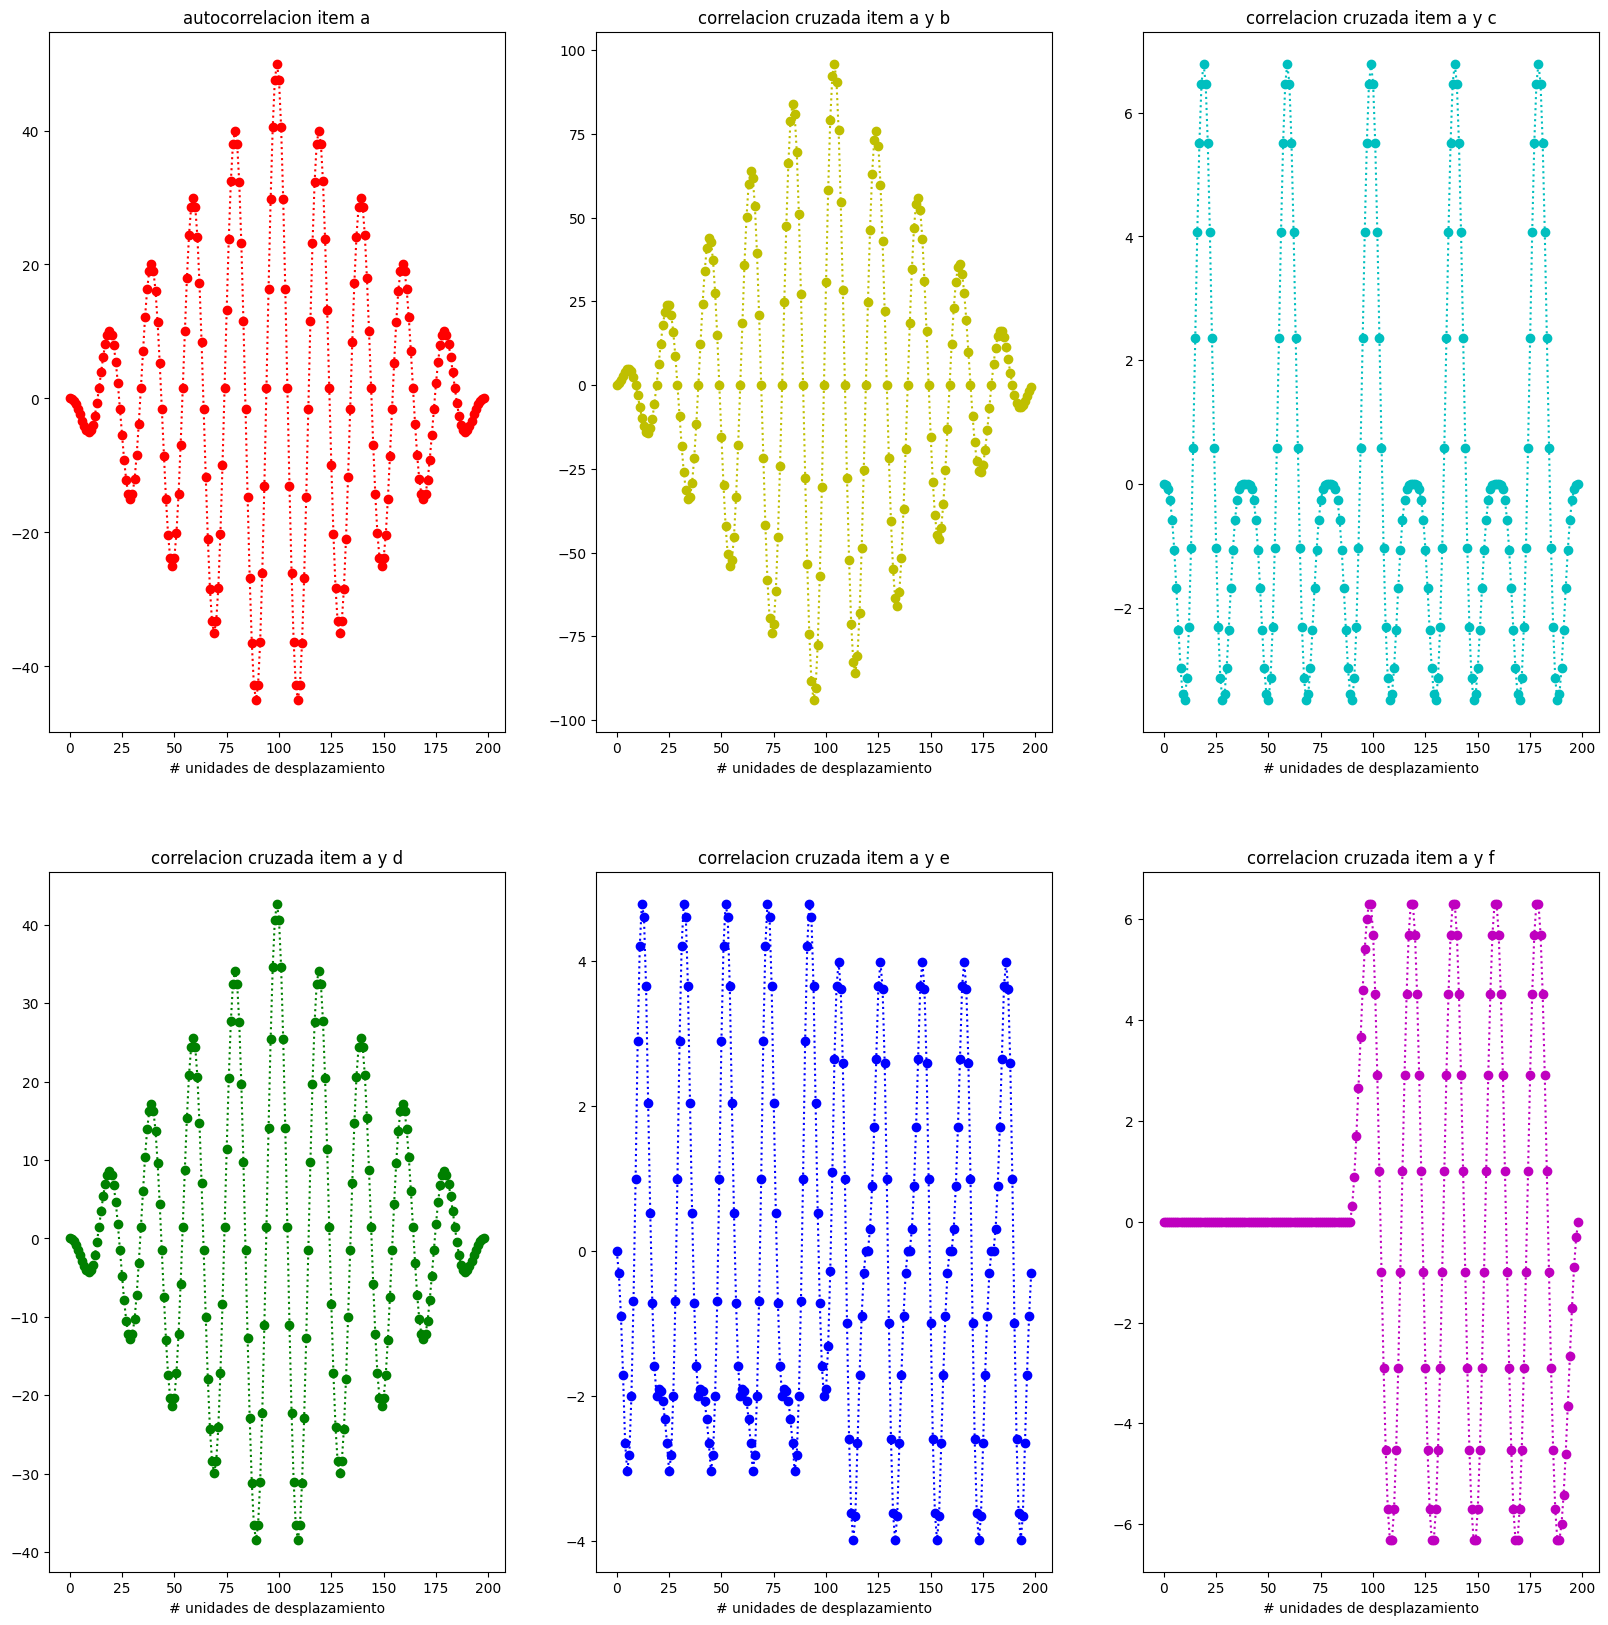

In [20]:
#------------------------------------Ejercicio 3---------------------------------------------------------------
"""3) Graficar la autocorrelación de la primera señal y la correlación entre ésta y las demás.
    scipy tiene funcion de autocorrelacion --> obtener la serie de autocorrelacion
"""

raa= signal.correlate(fa, fa)


rab=signal.correlate(fa, fb)


rac=signal.correlate(fa, fc)


rad=signal.correlate(fa, fd)


rae=signal.correlate(fa, fe)


raf=signal.correlate(fa, ff)


plt.figure(figsize=(20,20))
plt.subplot(2,3,1)
plt.title('autocorrelacion item a')
plt.xlabel('# unidades de desplazamiento')
plt.plot(raa,'o:', color='r')

plt.subplot(2,3,2)
plt.title('correlacion cruzada item a y b')
plt.xlabel('# unidades de desplazamiento')
plt.plot(rab,'o:', color = 'y')

plt.subplot(2,3,3)
plt.title('correlacion cruzada item a y c')
plt.xlabel('# unidades de desplazamiento')
plt.plot(rac,'o:', color='c')

plt.subplot(2,3,4)
plt.title('correlacion cruzada item a y d')
plt.xlabel('# unidades de desplazamiento')
plt.plot(rad,'o:', color='g')

plt.subplot(2,3,5)
plt.title('correlacion cruzada item a y e')
plt.xlabel('# unidades de desplazamiento')
plt.plot(rae,'o:',color ='b')

plt.subplot(2,3,6)
plt.title('correlacion cruzada item a y f')
plt.xlabel('# unidades de desplazamiento')
plt.plot(raf,'o:', color='m')

plt.show()


Para demostrar la identidad trigonométrica del producto a la suma del seno, se calcula ambos lados de la igualdad y se grafican los resultados. Se muestra primero el resultado del producto, luego de la suma, y por último la superposición de ambas (dado que la igualdad se cumple, no se pueden distinguir las funciones en el gráfico).

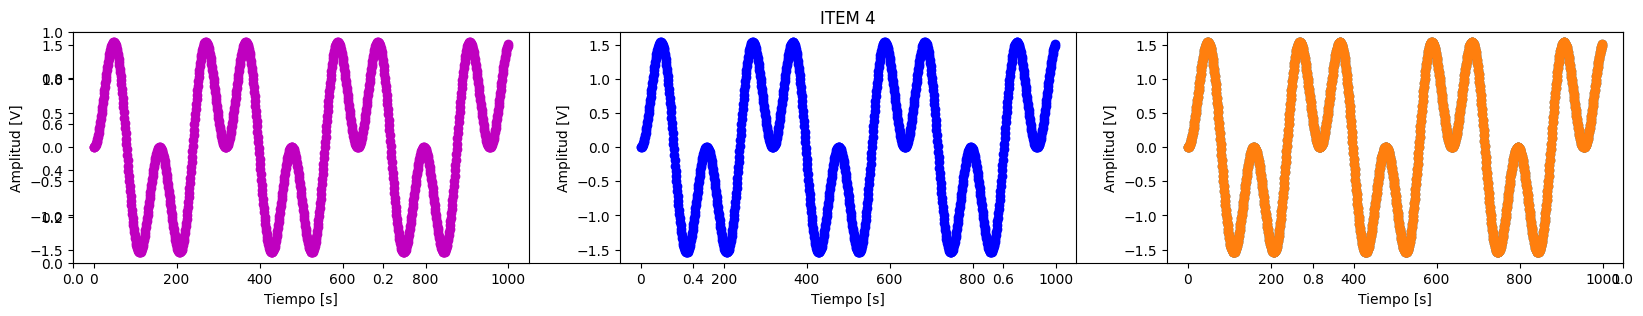

In [17]:
def mi_funcion_propTrigo(a=np.pi,b=np.pi/4):
    
    #defino el primer lado de la igualdad
    _,xa = mi_funcion_sen(frec=a)
    _,xaa = mi_funcion_sen(frec=b)
    fa=2*xa*xaa
    
    #defino el segundo lado de la igualdad
    _,xb = mi_funcion_cos(frec=(a-b))
    _,xbb = mi_funcion_cos(frec=(a+b))
    fb=xb-xbb 
    
    #grafico
    plt.figure()
    plt.title('ITEM 4')
    plt.subplot(1,3,1)
    plt.plot(fa,'o:', color='m')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud [V]')
    
    
    plt.subplot(1,3,2)
    plt.plot(fb,'o:', color ='b')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud [V]')
    
    plt.subplot(1,3,3)
    plt.plot(fa,'o:')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud [V]')
    plt.plot(fb,'o:')
       

"""4) Dada la siguiente propiedad trigonométrica: --> hay una funcion en numpy para comprobar autocorrelacion

2⋅ sin(α)⋅ sin(β) = cos(α-β)-cos(α+β) --> reemplazar por omega t, graficar en ambos casos y demostrar la igualdad

Demostrar la igualdad
Mostrar que la igualdad se cumple con señales sinusoidales, considerando α=ω⋅t, el doble de β (Use la frecuencia que desee).
"""
a=np.pi
b=2*a
ts1.mi_funcion_propTrigo(a,b) #llamo a la funcion y le paso 2 frecuencias en rad/s



# III. *Conclusiones*

# IV. *Autoevaluación del aprendizaje*